# load sprites data

In [10]:
# some setup code
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch.nn import init
from torch.autograd import Variable
import torchvision
import torchvision.transforms as T
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as dset

import itertools

import h5py

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import layers
import solvers

from params import *
from config import *

import utils

%matplotlib inline
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
params = SPRITESParameters()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
testfile = 'datasets/sprites/sprites_0.mat'
f = h5py.File(testfile)
sprites = list(f.values())[3]

In [12]:
import signal
import sys
def signal_handler(signal, frame):
        print('You pressed Ctrl+C!')
        sys.exit(0)
signal.signal(signal.SIGINT, signal_handler)
print('Press Ctrl+C')

Press Ctrl+C


In [22]:
import time
from threading import Thread

def noInterrupt():
    for i in range(4):
        print(i)
        time.sleep(1)

a = Thread(target=noInterrupt)
a.start()
a.join()
print("done")

0
1
2
3
done


In [9]:
import signal
import sys
def signal_handler(signal, frame):
        print('You pressed Ctrl+C!')
        sys.exit(0)
signal.signal(signal.SIGINT, signal_handler)
print('Press Ctrl+C')
signal.pause()

Press Ctrl+C
You pressed Ctrl+C!


SystemExit: 0

/home/qheldiv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2918: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


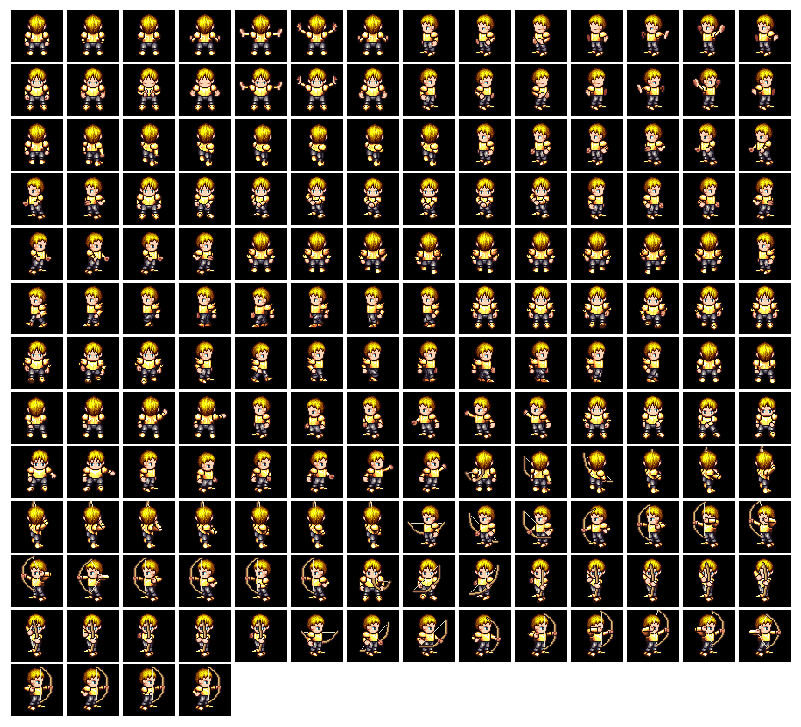

In [11]:
img_list = []
for ch in range(20):
    h5ref = np.array(sprites)[ch][0]
    imgs = np.array(f[h5ref])
    frames = imgs.size // 3//60//60
    imgs = imgs.reshape(frames,3,60,60).transpose(0,1,3,2)
    for i in range(frames):
        img_list.append(imgs[i])
utils.show_images(np.stack(img_list),params)
